https://github.com/sokunmin/machine-learning-for-trading



In [4]:
# Starting with the notes in Lesson 9: 01-08 OPTIMIZERS: Building a para....

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

## Lesson 9
## 01-08 Optimizers: Building a parametrized model

In [8]:
def f(X):
    '''Given a scalar X, return some value (a real number).'''
    Y = (X-1.5)**2 + 0.5
    print('X={}, Y={}'.format(X,Y))
    return Y

In [15]:
def test_run():
    Xguess = 2.0
    min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp':True})
    print('Minima found at:')
    print('X={}, Y={}'.format(min_result.x, min_result.fun))
    
    # Plot function values, mark minima
    Xplot = np.linspace(0.5, 2.5, 21)
    Yplot = f(Xplot)
    plt.plot(Xplot, Yplot)
    plt.plot(min_result.x, min_result.fun, 'ro')
    plt.title('Minima of an objective function')
    plt.show()

X=[2.], Y=[0.75]
X=[2.00000001], Y=[0.75000001]
X=[0.99999999], Y=[0.75000001]
X=[1.5], Y=[0.5]
X=[1.50000001], Y=[0.5]
Optimization terminated successfully    (Exit mode 0)
            Current function value: [0.5]
            Iterations: 2
            Function evaluations: 5
            Gradient evaluations: 2
Minima found at:
X=[1.5], Y=[0.5]
X=[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], Y=[1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


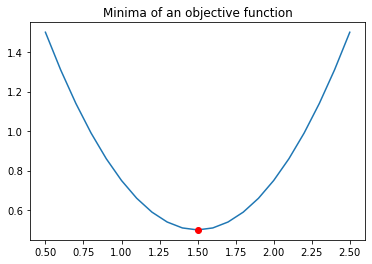

In [16]:
if __name__ == '__main__':
    test_run()

This algorithms need a convex function. This would mean that it would have one global minium.

In [23]:
def error(line, data):
    """Compute error between given line model and observed data.
    Parameters
    ----------
    line: tuple/list/array (C0, C1) where C0 is slope and C1 is Y-intercept
    data: 2D array where each row is a point (x, y)

    Returns error as a single real value.
    """
    # Metric: Sum of squared Y-axis differences
    c0 = line[0]
    c1 = line[1]
    x = data[:, 0]
    y = data[:, 1]
    err = np.sum((y - (c0 * x + c1)) ** 2)
    return err


def fit_line(data, error_func):
    """Fit a line to given data, using a supplied error function.

    Parameters
    ----------
    data: 2D array where each row is a point (X0, Y)
    error_func: funciton that computes the error between a line and observed data

    Returns line that minimizes the error function.
    """
    # Generate initial guess for line model
    line = np.float32([0, np.mean(data[:, 1])]) # slope = 0, intercept = mean(y values)

    # Plot initial guess (optional)
    x_ends = np.float32([-5, 5])
    plt.plot(x_ends, line[0] * x_ends + line[1], 'm--', linewidth=2.0, label='Initial guess')

    # Call optimizer to minimize error function
    # args: pass the data as argument to error_func
    result = spo.minimize(error_func, line, args=(data,), method='SLSQP', options={'disp':True})
    return result.x

def error_poly(C, data):
    """Compute error between given polynomial and observed data.

    Parameters
    ----------
    C(Coefficients for the polynomial): numpy.poly1d object or equivalent array representing polynomial coefficients
    data: 2D array where each row is a point (x, y)

    Returns error as a single real value.
    """
    # Metric: Sum of squared Y-axis differences
    # np.polyval(): Evaluate a polynomial at specific values.
    # for example, np.polyval([3,0,1], 5) ==> 3 * 5**2 + 0 * 5**1 + 1 ==> 76
    x = data[:, 0]
    y = data[:, 1]
    err = np.sum((y - np.polyval(C, x)) ** 2)
    return err

def fit_poly(data, error_func, degree=4):
    """Fit a polynomial to given data, using supplied error function.
    
    Parameters
    ----------
    data: 2D array where each row is a point (x, y)
    error_func: function that computes the error between a polynomial and observed difference

    Returns polynomial that minimizes the error funciton.
    """
    # Generate initial guess for polynomial model (all coeffs = 1)
    # for example, np.poly1d([1, 2, 3]) ==> 1x**2 + 2x + 3
    Cguess = np.poly1d(np.ones(degree + 1, dtype=np.float32))

    # Plot initial guess (optional)
    x = np.linspace(-5, 5, 21)
    plt.plot(x, np.polyval(Cguess, x), 'm--', linewidth=2.0, label='Initial guess')

    # Call optimizer to minimize error function
    # Sequential Least SQuares Programming (SLSQP).
    result = spo.minimize(error_func, Cguess, args=(data,), method='SLSQP', options={'disp':True})
    # for example, np.poly1d([1, 2, 3]) ==> 1x**2 + 2x + 3
    return np.poly1d(result.x) # convert optimal result into a poly1d object and return the result

Original line: C0 = 4.0, C1 = 2.0
Optimization terminated successfully    (Exit mode 0)
            Current function value: 165.81418360864035
            Iterations: 5
            Function evaluations: 19
            Gradient evaluations: 5
Fitted line: C0 = 4.1253421823638305, C1 = 0.9856543117371951


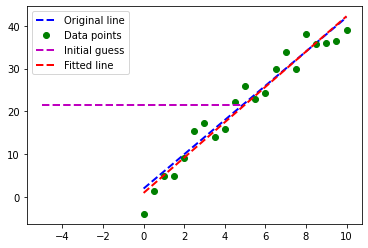

In [24]:
# Define original line
l_orig = np.float32([4, 2])
c0, c1 = l_orig[0], l_orig[1]
print('Original line: C0 = {}, C1 = {}'.format(c0, c1))
# Xorig = [0., 0.5, 1., ..., 10.]
Xorig = np.linspace(0, 10, 21)
# Yorig = [2., 4., 6., ..., 42.]
Yorig = c0 * Xorig + c1
plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label='Original line')

# Generate noisy data points
noise_sigma = 3.0
# Draw random samples from a normal (Gaussian) distribution.
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
x, y = data[:, 0], data[:, 1]
plt.plot(x, y, 'go', label='Data points')

# Try to fit a line to this data
l_fit = fit_line(data, error)
fit_c0, fit_c1 = l_fit[0], l_fit[1]
print('Fitted line: C0 = {}, C1 = {}'.format(fit_c0, fit_c1))
plt.plot(x, fit_c0 * x + fit_c1, 'r--', linewidth=2.0, label='Fitted line')

# Add a legend and show plot
plt.legend(loc='upper left')
plt.show()

     4      3     2
1.5 x - 10 x - 5 x + 60 x + 50
Optimization terminated successfully    (Exit mode 0)
            Current function value: 54.8147699358599
            Iterations: 8
            Function evaluations: 66
            Gradient evaluations: 8
       4         3         2
1.503 x - 10.01 x - 5.066 x + 60.04 x + 50.21


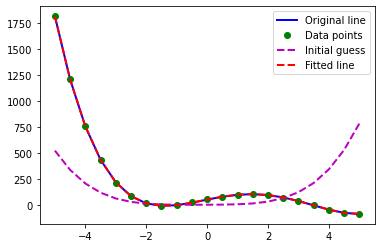

In [25]:
# Fitting Higher Order Polynomials
Cguess = np.poly1d([1.5, -10, -5, 60, 50])
print(Cguess)
Xorig = np.linspace(-5, 5, 21)
Yorig = np.polyval(Cguess, Xorig)
plt.plot(Xorig, Yorig, 'b', linewidth=2.0, label='Original line')

# Generate noisy data points
noise_sigma = 3.0
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
x, y = data[:, 0], data[:, 1]
plt.plot(x, y, 'go', label='Data points')

# Try to fit a line to this data
fit_coef = fit_poly(data, error_poly)
print(fit_coef)
plt.plot(x, np.polyval(fit_coef, x), 'r--', linewidth=2.0, label='Fitted line')

# Add a legend and show plot
plt.legend(loc='upper right')
plt.show()

## Lesson 10
## 01-09 Optimizers: How to optimize a portfolio

### <font color=blue>Optimizers: How to optimize a portfolio?</font>
**`What is application portfolio optimization? `**<br/>
Given a set of assets and a time period, find an allocation of funds to assets that maximizes performance.

**`What is performance?`**<br/>
We could choose from a number of metrics, including cumulative return, volatility or risk, and risk adjusted return, which is Sharpe ratio.

**`Framing the problems`**<br/>
* Provide a function to minimize     
  * <font color=blue>$f(x)$</font> where <font color=blue>$x$</font> are the allocations that we're looking for. It can be multiple dimensions, each dimension of x here is an allocation to each of the stocks.
  * Let the optimizer try different allocations in order to discover the best set of allocations that optimizes this function.
  * Try to find the largest Sharpe ratio multiplying by a negative 1 using optimizer.
  * Becomes <font color=blue>$f(x) = SharpeRatio * -1$</font>
* Provide an initial guess for <font color=blue>$x$</font>
* Call the optimizer

**`Ranges and constraints`**
One of them will help your optimization run faster.

1. Tell the optimizer that it should only look at certain ranges for X.
 * In other words, for this problem, for each of the various allocations, it's only worth looking at values between 0 and 1.
 * It's only feasible to have 0% to 100% or 0 to 1 in each of these assets. So, tell the optimizer only focus on values between 0 and 1 for each of the dimensions of X.

2. The optimizers in numbpie are provide constraints.
 * Constraints are properties of the values of X that must be true. As an example we want the sum of our allocations to add up to one.
 * Let's say we have X0, X1, X2, X3 four holdings in a portfolio. We want the sum of the absolute values of those to be equal to 1.0.
 * In other words, our total allocation should add up to 100%. you end up with a total of 100% allocated to the various assets.
 * <font color=blue>$\sum_{i=0}^{3} abs(x_i) = 1.0$</font>

## Lesson 11
## 02-01: So you want to be a hedge fund manager?

--------
### <font color=blue>Types of Funds</font>

ETF(Exchange-traded funds)| Mutual Fund           | Hedge Fund     
--------------------------|-----------------------|--------------- 
Buy/Sell like stocks      | Buy/Sell at end of day| Buy/Sell by agreement
Baskets of stocks         | Quarterly disclosure  | No disclosure
Transparent, Liquid       | Less transparent      | Not transparent

* Large cap: large capitalization, which means how much a company is worth according to number of shares that are outstanding, times the price of the stock.
* <font color=blue>$LargeCap = Share * Prices$</font>: the price of a stock really only relates to what one share is selling at. It doesn't relate to the overall value of the company.
* Hedge funds typically have no more than 100 investors, whereas all other types of sumbols have thousands and even millions of investors.
* ETFs have 3 or 4 letters, Mutual funds have 5 letters, and Hedge funds

### <font color=blue>Incentives For Fund Managers</font>
Funds| Incentives
----|----
ETFs| Expense Ratio 0.01% ~ 1.00%
Mutual Funds | Expense Ratio 0.5% ~ 3.00%
Hedge Funds | "Two and Twenty"

* **`Assets Under Management (AUM)`** is the total amount of money being managed by the fund.<br/>
 * All of these part of the compensation is a percentage of the AUM.<br/>
 * **`Expense ratio`** is some percentage of AUM.
* Expediture issues for **`ETFs`** are usually pretty low.
* **`ETFs`** usually are tied to an index. As an example, a popular ETF, SPY is supposed to track the S&P500
* **`Mutual funds`** supposedly use more skill and charge a higher expense ratio
* **`Hedge funds`** follows a model called "Two and Twenty", which means 2% of AUM, plus 20% of the profits

This structure **`Two and Twenty`** has been assailed lately.
It's very rate now to find a hedge fund that offers rates that high.
They're much lower now like **`One and Ten`**.
The **`Two and Twenty`** was in the heyday of hedge funds in the '90s and early 2000s

## Lesson 12
## 02-02: Market Mechanics

![Orders Books](images/orders_books.png) 

![Orders and Exchanges](images/orders_and_exchanges.png) 

Short selling explained in the video

## Lesson 13
## 02-03: What is a company worth?

* `Intrinsic value:` its the sum of the dividends the company will pay you in the future (based on future dividents). So given the present value as follows PV=FV/(1+IR)^i, then the intrinsec value is the FV/DR, being DR discount rate (risk of stock). 
* `Book value:` "Total assets minus intangible assets and liabilities", value of the company if we split the company into pieces and we sell them individually.
* `Market Cap:` #shares x price

* If Intrinsic Value < Market Cap: may be worthwile to short this stock.
* If Dividends are going up and Market Cap is low: might be an opportunity to buy the stock.
* If Stock price is approaching Book Value, you can assume it can not go below the Book Value. If it does, a buyer could buy the whole company and split into pieces.

----
### <font color=blue>The Capital Assets Pricing Model (The CAPM)</font>

#### Definition of Portfolio
![TheCAPM](images/the_capm_define.png)  
<font color=blue>$w_i$</font>: portion of funds in asset <font color=blue>$i$</font><br/>
<font color=blue>$r_i$</font>: the return of asset <font color=blue>$i$</font><br/>
<font color=blue>$r_p$</font>: the return on the portfolio on that day <font color=blue>$t$</font><br/>
<br/>
#### Cap weighted
![TheCAPM](images/the_capm_weighted.png)  
<font color=blue>$\sum_{j}{MarketCap_j}$</font>: the sum of the market caps of all the stocks.<br/>
<br/>
#### The CAPM equation
![TheCAPM](images/the_capm_equation.png)  
<font color=blue>$r_i(t)$</font>: the return for an individual stock on a particular day <font color=blue>$t$</font>
where <font color=blue>$i$</font> is one of stocks in the market <font color=blue>$m$</font><br/>
<font color=blue>$r_m(t)$</font>: the return on the market <font color=blue>$m$</font> such as **`S&P500`**<br/>
<font color=blue>$\alpha_i(t)$</font>: the particular stock on that day <font color=blue>$t$</font><br/>
<font color=red>$\beta_ir_m(t)$ (market)</font>: what the capital assets pricing model is asserting is that a significant portion of the return for a particular stock is due to the market. In other words, the market moving up or down strongly affects the change in price on every individual stock. Every stock has its individual <font color=red>$\beta$</font> that specifies how much it's affected. For example, if <font color=red>$\beta$</font> is 2, that means if the market goes up 1%, the stock goes up 2%.<br/>

<font color=red>$\alpha_i(t)$ (residual)</font>: if we look at all the stocks over one day and look at how much the market goes up or down, and how much the stock should have gone up or down according to <font color=red>$\beta$</font>, there will be something left over, which won't exactly match what <font color=red>$\beta$</font> predicted. That's what <font color=red>$\alpha$</font> or **`residual component`** is.<br/>

<font color=red>$E = 0$</font>: an important part of the capital assets pricing model is that the expectation <font color=red>$E$</font> for <font color=red>$\alpha$</font> is 0, where <font color=red>$E$</font> is a random variable with an expected value of 0.

![TheCAPM](images/the_capm.png)  
In this plot, each green dot represents one day. 
When we fit a line to it, <font color=red>$\beta$</font> represents the slope of the red solid line. <font color=red>$\alpha$</font> is the y-intercept of the red line.<br/><br/>
Historically a particular stock looking back at time gave you a particular <font color=red>$\alpha$</font>, you shouldn't necessarily expect that in the future.<br/>
The CAPM says that you should expect <font color=red>$\alpha$</font> to be 0, it's random and unpredictable. It can be negative or positive, small or large. On average, it's gonna be 0. <br/>
In reality though, it's not always 0. That's the key to the CAPM pricing model and where <font color=red>$\beta$</font> and <font color=red>$\alpha$</font> come from.

#### CAPM for portfolio
![TheCAPMPortfolio](images/the_capm_portfolio.png) 

-----
### <font color=blue>Arbitrage Pricing Theory (APT)</font>
![APT](images/the_apt.png) 
In CAPM, we have single <font color=red>$\beta$</font> that represents a particular stock's relationship to the market. <br/>
The CAPM allows us to consider a stock in the entire market. <br/>

But in APT, it might have multiple <font color=red>$\beta$</font>. <br/>
We have to consider the different industries. In other words a particular stock might have exposure to different aspects of the market. <br/>
For example, the stock might have some exposure to finance, so we could compute the component of return <font color=red>$r_i$</font> due to finance via the <font color=red>$\beta_{iF}$</font> with regard to finance and the return <font color=red>$r_{iF}$</font> for finance of that day.

### <font color=blue>Two stock scenario</font>
#### <center><font color=red>< Scenario 1 ></font></center>
![TwoStock](images/two_stock_1.png)<br/>

#### <center><font color=red>< Scenario 2 ></font></center>
![TwoStock](images/two_stock_2.png) 
We only had <font color=blue>50%</font> over allocation in each one of stocks.

#### <center><font color=red>< Scenario 3 ></font></center>
![TwoStock](images/two_stock_3.png) 

#### <center><font color=red>< Scenario 4 ></font></center>
![TwoStock](images/two_stock_4.png) 
We eliminate the return on the market. So whichever way the market goes, we can expect to get 1% return.  <br/>
These <font color=red>betas</font> and <font color=red>alphas</font> aren't necessarily fully guaranteed to continue into the future.  <br/>
They are just estimated that we computed based on information we though we had. <br/>
This is not a guaranteed thing by any means, but it is a way to use long/short investing to reduce exposure to the market overall and to focus on those <font color=red>alpha</font> components where we do have information.

### <font color=blue>CAPM summary</font>
![TheCAPM](images/the_capm_summary.png) 
* For assuming, convert actionable information into a forecast <font color=blue>$\alpha_i$</font> (a prediction) for particular stock <font color=blue>$i$</font>, about which way it's going to go. 
* And also the <font color=blue>$\beta_i$</font> of that stock with regard to the market.
* We can minimize market risk by finding a <font color=blue>$\beta_p$</font> for our portfolio <font color=blue>$p$</font> that's equal to zero. 
* We can do that by finding the appropriate weights $w_i$ on each individual stock. So CAPM can be a really valuable tool in terms of portfolio construction because it can enable you to build these portfolios that are less exposed to market risk.

From here I started back in Nov // Juan

# Technical Analysis

## Lesson 16:
## 01-06 Technical Analysis

What it is:
* Historical price and volume only
* Compute statistics called indicators
* Indicators are heuristics

Why it might work:
* There is information in price
* Heuristics work

### <font color=blue>When is Technical Analysis effective?</font>
* Individual indicators weak  
* Combinations stronger 
* Look for contrasts (stock vs. market) - No point on analyzing stocks that move the same
* Shorter time periods

### <font color=blue>When does Technial Analysis have value?</font>
![TechAnalysis](images/tech_analysis_1.png) 

#### <font color=red>Indicator: Momentum</font>
![Momentum](images/indicator_momentum.png) 
Range: [-0.5 ~ 0.5]  
 * -0.5 = -50% drop
 * 0.5 = 50% up
 
#### <font color=red>Indicator: Simple Moving Average (SMA)</font>
![SMA](images/indicator_sma.png) 
* <font color=blue><b>Proxy for underlying value</b></font>: if you look back over a certain period of time and take the average price, that might represent the true value of the company
* <font color=blue><b>Arbitrage opportunity</b></font>: if we see a large excursion from that price, for instance, we should expect that the price is eventually going to come back down to that average. So it's an arbitrage opportunity.<br/>
* <font color=blue><b>Quantify the diversion</b></font>: compare the current price with the current moving average, and construct a ratio. For example, we've gotten negative values and positive values, we take particular positive/negative price for day $t$ and divided by the mean for the last n-days. The values are ranging from -50% to 50%.
 
#### <font color=red>Indicator: Bollinger Bands</font>
![SMA](images/indicator_bollinger_bands.png) 
* If low volatility stocks are currently experiencing low volatility, we can use a smaller number for that trigger. 
* When we see high volatility, we can use a larger number.
* We can use standard deviation to accomplish it.
* <font color=blue><b>How to use</b></font>: <font color=red>look for cross from outside band to inside band.</font>

**Q: Buy or Sell**
![QBB](images/bb_buy_or_sell.png)

#### <font color=red>Normalization</font>
![Norm](images/tech_analysis_norm.png) 
* The normalization takes each of these factors and essentially compressses them or stretches them, they vary on average <font color=blue><b>from -1 to +1 with the mean of 0</font>.

----
#### <font color=blue>How data is aggregated?</font>
![Data](images/data_tick.png) 
* <font color=blue>Tick</font>: a tick represents a successful by cell match or a successful transaction.